# Selecting the best model with Best hyperparameters

In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# train test split the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# import regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#import grid search cv for cross validation
from sklearn.model_selection import GridSearchCV

# import preprocessors
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [5]:
# load dataset
df = sns.load_dataset('tips')

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

## Rergression Tasks

In [8]:
# select features and variables
X = df.drop('tip', axis=1)
y = df['tip']

# label encode categorical variables
le = LabelEncoder()
X['sex'] = le.fit_transform(X['sex'])
X['smoker'] = le.fit_transform(X['smoker'])
X['day'] = le.fit_transform(X['day'])
X['time'] = le.fit_transform(X['time'])


### Best Model selection based on MAE

Sorted models with Mean Absolute error
[('SVR', 0.5707097371316319), ('LinearRegression', 0.6703807496461157), ('XGBRegressor', 0.6721697168934103), ('GradientBoostingRegressor', 0.725465504439011), ('KNeighborsRegressor', 0.7262448979591837), ('RandomForestRegressor', 0.765279591836735), ('DecisionTreeRegressor', 0.9316326530612246)]


--------------------------------------
Mean Absolute error for SVR is  0.57
Mean Absolute error for LinearRegression is  0.67
Mean Absolute error for XGBRegressor is  0.67
Mean Absolute error for GradientBoostingRegressor is  0.73
Mean Absolute error for KNeighborsRegressor is  0.73
Mean Absolute error for RandomForestRegressor is  0.77
Mean Absolute error for DecisionTreeRegressor is  0.93
('SVR', 0.5707097371316319)


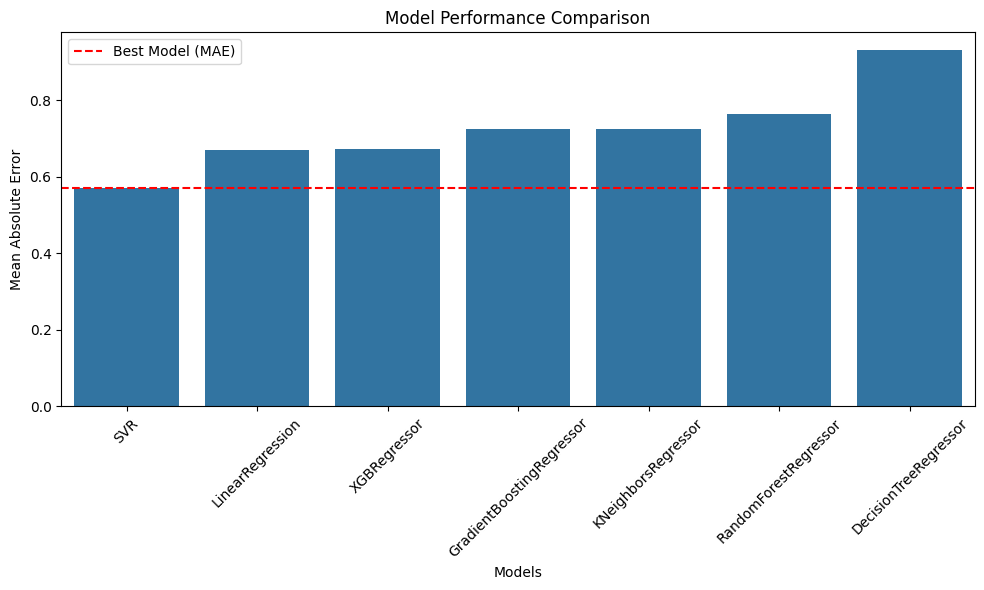

CPU times: user 998 ms, sys: 301 μs, total: 998 ms
Wall time: 386 ms


In [ ]:
%%time
# split the data into train and test data with 80% training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a dictionaries of list of models to evaluate performance
models = { 
          'LinearRegression' : LinearRegression(),
          'SVR' : SVR(),
          'DecisionTreeRegressor' : DecisionTreeRegressor(),
          'RandomForestRegressor' : RandomForestRegressor(),
          'KNeighborsRegressor' : KNeighborsRegressor(),
          'GradientBoostingRegressor' : GradientBoostingRegressor(),
          'XGBRegressor' : XGBRegressor()          
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models

model_scores = []
for name, model in models.items():
    # fit each model from models on training data
    model.fit(X_train, y_train)
    
    # make prediction from each model
    y_pred = model.predict(X_test)
    metric = mean_absolute_error(y_test, y_pred)
    model_scores.append((name, metric))
    
    # # print the performing metric
    # print(name, 'MSE: ', mean_squared_error(y_test, y_pred))
    # print(name, 'R2: ', r2_score(y_test, y_pred))
    # print(name, 'MAE: ', mean_absolute_error(y_test, y_pred))
    # print('\n')

# selecting the best model from all above models with evaluation metrics sorting method
sorted_models = sorted(model_scores, key=lambda x: x[1], reverse=False) # sort by second element of tuple(which is MAE) in ascending order
print('Sorted models with Mean Absolute error')
print(sorted_models)
print('\n')
print('--------------------------------------')
for model in sorted_models:
    print('Mean Absolute error for', f"{model[0]} is {model[1]: .2f}") 

# MAE for SVR is 0.57 which is smallest of all models. Hence, it is the best model

# get tuple of model with least MAE
best_model = sorted_models[0]
# plotting all the models with their MAE
plt.figure(figsize=(10, 6))
sns.barplot(x=[model[0] for model in sorted_models], y=[model[1] for model in sorted_models])
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
# mark best model on plot
plt.axhline(y=best_model[1], color='r', linestyle='--', label='Best Model (MAE)') # red dashed line for best model - axhline means horizontal line across the axis
plt.legend()
plt.tight_layout()
plt.show()


## Best model based on R2 score

In [ ]:
%%time
# split the data into train and test data with 80% training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a dictionaries of list of models to evaluate performance
models = { 
          'LinearRegression' : LinearRegression(),
          'SVR' : SVR(),
          'DecisionTreeRegressor' : DecisionTreeRegressor(),
          'RandomForestRegressor' : RandomForestRegressor(),
          'KNeighborsRegressor' : KNeighborsRegressor(),
          'GradientBoostingRegressor' : GradientBoostingRegressor(),
          'XGBRegressor' : XGBRegressor()          
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models

model_scores = []
for name, model in models.items():
    # fit each model from models on training data
    model.fit(X_train, y_train)
    
    # make prediction from each model
    y_pred = model.predict(X_test)
    metric = r2_score(y_test, y_pred)
    model_scores.append((name, metric))
    
    # # print the performing metric
    # print(name, 'MSE: ', mean_squared_error(y_test, y_pred))
    # print(name, 'R2: ', r2_score(y_test, y_pred))
    # print(name, 'MAE: ', mean_absolute_error(y_test, y_pred))
    # print('\n')

# selecting the best model from all above models with evaluation metrics sorting method
sorted_models = sorted(model_scores, key=lambda x: x[1], reverse=True) # sort by second element of tuple(which is R2) in descending order
for model in sorted_models:
    print('R_squared Score', f"{model[0]} is {model[1]: .2f}") 

# R2 score for SVR is 0.57 which is largest of all models. Hence, it is the best model

## Best model based on MSE

In [ ]:
%%time
# split the data into train and test data with 80% training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a dictionaries of list of models to evaluate performance
models = { 
          'LinearRegression' : LinearRegression(),
          'SVR' : SVR(),
          'DecisionTreeRegressor' : DecisionTreeRegressor(),
          'RandomForestRegressor' : RandomForestRegressor(),
          'KNeighborsRegressor' : KNeighborsRegressor(),
          'GradientBoostingRegressor' : GradientBoostingRegressor(),
          'XGBRegressor' : XGBRegressor()          
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models

model_scores = []
for name, model in models.items():
    # fit each model from models on training data
    model.fit(X_train, y_train)
    
    # make prediction from each model
    y_pred = model.predict(X_test)
    metric = mean_squared_error(y_test, y_pred)
    model_scores.append((name, metric))
    
    # # print the performing metric
    # print(name, 'MSE: ', mean_squared_error(y_test, y_pred))
    # print(name, 'R2: ', r2_score(y_test, y_pred))
    # print(name, 'MAE: ', mean_absolute_error(y_test, y_pred))
    # print('\n')
# selecting the best model from all above models with evaluation metrics sorting method
sorted_models = sorted(model_scores, key=lambda x: x[1], reverse=False)
for model in sorted_models:
    print('Mean Absolute error for', f"{model[0]} is {model[1]: .2f}") 

# MSE for SVR is 0.54 which is smallest of all models. Hence, it is the best model

## **Assignment:** Find the best model based on each metrics from above mentioned results?  with Diamonds dataset

In [ ]:
diamonds = sns.load_dataset('diamonds')

---

# Hyperparameter tuning:

In [ ]:
%%time
# Create a dictionaries of list of models to evaluate performance with hyperparameters
models = { 
          'LinearRegression' : (LinearRegression(), {}),
          'SVR' : (SVR(), {'kernel': ['rbf', 'poly', 'sigmoid']}),
          'DecisionTreeRegressor' : (DecisionTreeRegressor(), {'max_depth': [None, 5, 10]}),
          'RandomForestRegressor' : (RandomForestRegressor(), {'n_estimators': [10, 100]}),
          'KNeighborsRegressor' : (KNeighborsRegressor(), {'n_neighbors': np.arange(3, 100, 2)}),
          'GradientBoostingRegressor' : (GradientBoostingRegressor(), {'n_estimators': [10, 100]}),
          'XGBRegressor' : (XGBRegressor(), {'n_estimators': [10, 100]}),          
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models

for name, (model, params) in models.items():
    # create a pipline
    pipeline = GridSearchCV(model, params, cv=5)
    
    # fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # make prediction from each model
    y_pred = pipeline.predict(X_test)
    
    # best parameters for each model
    best_params = pipeline.best_params_
    print(name, 'Best Parameters: ', best_params)
    
      
    # print the performing metric
    print(name, 'MSE: ', mean_squared_error(y_test, y_pred))
    print(name, 'R2: ', r2_score(y_test, y_pred))
    print(name, 'MAE: ', mean_absolute_error(y_test, y_pred))
    print('\n')

### Note, ensure to give more time to run this cell!

In [ ]:
%%time
# Note, ensure to give more time to run this cell
# Create a dictionaries of list of models to evaluate performance with hyperparameters
from sklearn.model_selection import RandomizedSearchCV
models = { 
          'LinearRegression' : (LinearRegression(), {}),
          'SVR' : (SVR(), {'kernel': ['rbf', 'poly', 'sigmoid'], 'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'epsilon': [0.1, 0.01, 0.001]}),
          'DecisionTreeRegressor' : (DecisionTreeRegressor(), {'max_depth': [None, 5, 10], 'splitter': ['best', 'random']}),
          'RandomForestRegressor' : (RandomForestRegressor(), {'n_estimators': [10, 100, 1000], 'max_depth': [None, 5, 10]}),
          'KNeighborsRegressor' : (KNeighborsRegressor(), {'n_neighbors': np.arange(3, 100, 2), 'weights': ['uniform', 'distance']}),
        #   'GradientBoostingRegressor' : (GradientBoostingRegressor(), {'loss': ['ls', 'lad', 'huber', 'quantile'], 'n_estimators': [10, 100, 1000]}),
          'GradientBoostingRegressor' : (GradientBoostingRegressor(), {'loss': ['squared_error', 'huber', 'absolute_error', 'quantile'], 'n_estimators': [10, 100, 1000]}),
          'XGBRegressor' : (XGBRegressor(), {'n_estimators': [10, 100, 1000], 'learning_rate': [0.1, 0.01, 0.001]}),          
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models

for name, (model, params) in models.items():
    # create a pipline
    pipeline = RandomizedSearchCV(model, params, cv=5)
    
    # fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # make prediction from each model
    y_pred = pipeline.predict(X_test)
    
      
    # print the performing metric
    print(name, 'MSE: ', mean_squared_error(y_test, y_pred))
    print(name, 'R2: ', r2_score(y_test, y_pred))
    print(name, 'MAE: ', mean_absolute_error(y_test, y_pred))
    print('\n')

# **Assignment:** How to get best parameters of each model, write in the for loop among the code, how to get best model out of it?

## Solution:

In [ ]:
# Write your Code here

##############################################################################################################

---


# **Add preprocessor inside the pipeline**

## Assignment: Find the errors

In [ ]:
# make a preprocessor

# split the data into train and test data with 80% training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[('numeric_scaling', StandardScaler(), ['total_bill', 'size'])], remainder='passthrough')


# Create a dictionaries of list of models to evaluate performance with hyperparameters
models = { 
          'LinearRegression' : (LinearRegression(), {}),
          'SVR' : (SVR(), {'kernel': ['rbf', 'poly', 'sigmoid'], 'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'epsilon': [0.1, 0.01, 0.001]}),
          'DecisionTreeRegressor' : (DecisionTreeRegressor(), {'max_depth': [None, 5, 10], 'splitter': ['best', 'random']}),
          'RandomForestRegressor' : (RandomForestRegressor(), {'n_estimators': [10, 100, 1000], 'max_depth': [None, 5, 10]}),
          'KNeighborsRegressor' : (KNeighborsRegressor(), {'n_neighbors': np.arange(3, 100, 2), 'weights': ['uniform', 'distance']}),
        #   'GradientBoostingRegressor' : (GradientBoostingRegressor(), {'loss': ['ls', 'lad', 'huber', 'quantile'], 'n_estimators': [10, 100, 1000]}),
          'GradientBoostingRegressor' : (GradientBoostingRegressor(), {'loss': ['squared_error', 'huber', 'absolute_error', 'quantile'], 'n_estimators': [10, 100, 1000]}),
          'XGBRegressor' : (XGBRegressor(), {'n_estimators': [10, 100, 1000], 'learning_rate': [0.1, 0.01, 0.001]}),          
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models

for name, (model, params) in models.items():
    # create a pipline with preprocessor
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])   
    
    # make a grid search cv to tune the hyperparameter
    # Prefix model parameters with 'model__' to target the model step in the pipeline
    prefixed_params = {f'model__{key}': value for key, value in params.items()}
    grid_search = GridSearchCV(pipeline, prefixed_params, cv=5)
    
    
    # fit the pipeline
    grid_search.fit(X_train, y_train)
    
    # make prediction from each model
    y_pred = grid_search.predict(X_test)
    
      
    # print the performing metric
    print(name, 'MSE: ', mean_squared_error(y_test, y_pred))
    print(name, 'R2: ', r2_score(y_test, y_pred))
    print(name, 'MAE: ', mean_absolute_error(y_test, y_pred))
    print('\n')

<!-- # Classifiers: -->

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# dont show warnings
import warnings
warnings.filterwarnings('ignore')

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a dictionary of classifiers to evaluate
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Perform k-fold cross-validation and calculate the mean accuracy
kfold = KFold(n_splits=5, shuffle=True, random_state=42) # kFold cross-validation works better here instead of other CV techniques

for name, classifier in classifiers.items():
    scores = cross_val_score(classifier, X, y, cv=kfold) # default scoring is accuracy for classification
    accuracy = np.mean(scores)
    print("Classifier:", name)
    print("Mean Accuracy:", accuracy)
    print()

# **Main Assignment:**

#### Write the complete code to select the best Regressor and classifier for the given dataset called diamonds `(if you have a high end machine, you can use the whole dataset, else use the sample dataset provided )` or you can use Tips datset for Regression task and Iris dataset for Classification task.

#### You have to choose all possible models with their best or possible hyperparameters and compare them with each other and select the best model for the given dataset.

#### Your code should be complete and explained properly. for layman, each and every step of the code should be commented properly.

#### You code should also save the best model in the pickle file.

#### You should also write the code to load the pickle file and use it for prediction. in the last snippet of the code.